**Imports**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anmarkareem/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anmarkareem/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Exploring the Dataset**

In [12]:
dataset_path = "Tweets.csv"
df = pd.read_csv(dataset_path)

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


**Data Cleaning**

In [13]:
df = df.dropna()

df = df.drop_duplicates()

df['tag_id'] = df['sentiment'].map({'neutral': 0, 'positive': 1, 'negative': 2})

**Exploratory Data Analysis**

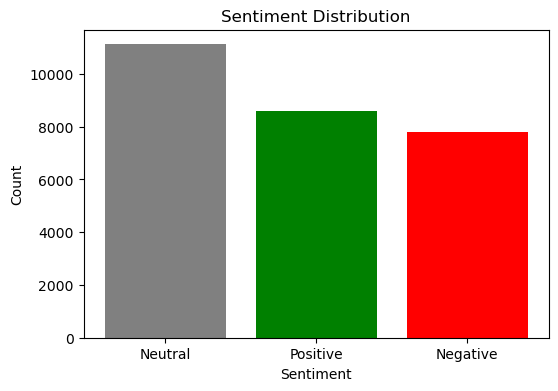

In [14]:
sentiment_counts = df['tag_id'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['gray', 'green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(ticks=[0, 1, 2], labels=['Neutral', 'Positive', 'Negative'])
plt.show()

**Word Cloud for Text Visualization**

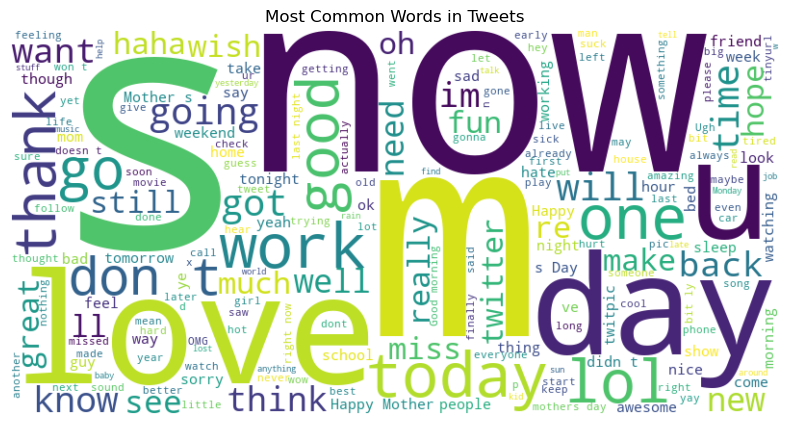

In [15]:
tweet_text = ' '.join(df['text'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tweet_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Tweets")
plt.show()

**Text Tokenization and Feature Extraction**

In [16]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])
y = df['tag_id']

**Splitting Data for Training and Testing**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Training a Machine Learning Model**

In [18]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

**Performance Evaluaiton**

In [19]:
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print(classification_report(y_test, y_pred))

Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.54      0.81      0.65      2236
           1       0.73      0.58      0.64      1688
           2       0.76      0.41      0.53      1572

    accuracy                           0.62      5496
   macro avg       0.68      0.60      0.61      5496
weighted avg       0.66      0.62      0.61      5496

